### Importing all the required libraries

In [17]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import vpython as vs

from sklearn.preprocessing import MinMaxScaler
from IPython.display import display
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report,confusion_matrix

import warnings

warnings.filterwarnings("ignore",category=DeprecationWarning) 


### Loading dataset

In [2]:
pureData = pd.read_csv("./benign_traffic.csv")
print("Non-malicious Dataset")
display(pureData.head())

Non-malicious Dataset


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.0,0.0
1,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.000000,0.0,0.0,1.061357,60.000000,9.540000e-07,60.000000,9.090000e-13,0.0,0.0
2,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.0,0.0
3,1.000000,590.0,0.0,1.000000,590.0,0.0,1.000000,590.0,0.0,1.000000,...,9591.400096,0.0,0.0,5.832783,388.850426,9.199164e+01,388.850426,8.462461e+03,0.0,0.0
4,1.927179,590.0,0.0,1.955648,590.0,0.0,1.984992,590.0,0.0,1.998489,...,6354.393843,0.0,0.0,6.831901,418.293119,1.108120e+02,418.293119,1.227931e+04,0.0,0.0


In [3]:
maliciousDataset = pd.read_csv("./junk.csv")
print("Malicious Dataset")
display(maliciousDataset.head())

Malicious Dataset


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,...,0.0,0.0,0.0,1.000000,98.0,0.0,98.000000,0.0,0.0,0.0
1,1.029191,98.000000,0.000000,1.119992,98.000000,1.818989e-12,1.493231,98.000000,3.637979e-12,1.931762,...,0.0,0.0,0.0,1.992957,98.0,0.0,138.592929,0.0,0.0,0.0
2,1.077270,68.295282,68.180692,1.236877,72.128396,1.585514e+02,1.889672,81.065843,2.551274e+02,2.834273,...,0.0,0.0,0.0,1.000000,66.0,0.0,114.039467,0.0,0.0,0.0
3,2.038100,71.094319,42.860737,2.209694,72.975393,8.766659e+01,2.875726,78.608779,1.777339e+02,3.832174,...,0.0,0.0,0.0,1.000000,74.0,0.0,74.000000,0.0,0.0,0.0
4,3.000117,72.062842,30.450564,3.184892,73.297101,6.036696e+01,3.864926,77.416316,1.358213e+02,4.830732,...,0.0,0.0,0.0,1.000000,74.0,0.0,74.000000,0.0,0.0,0.0


### Description of dataset

In [4]:
print("There are %d records with %d features in non-malicious dataset"%(pureData.shape[0],pureData.shape[1]))

display(pureData.describe())

There are 19528 records with 115 features in non-malicious dataset


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,19528.000000,19528.000000,1.952800e+04,19528.000000,19528.000000,1.952800e+04,19528.000000,19528.000000,19528.000000,19528.000000,...,1.952800e+04,1.952800e+04,19528.000000,19528.000000,19528.000000,1.952800e+04,19528.000000,1.952800e+04,1.952800e+04,1.952800e+04
mean,1.437161,220.834245,2.724827e+02,1.463570,220.778503,3.738582e+02,1.595291,224.868835,1820.979500,3.889901,...,4.364406e+03,-4.915106e+01,-0.000933,9.929299,221.421668,5.824017e+00,312.006846,5.518521e+03,-2.665431e+02,-2.206464e-02
std,1.134468,131.138429,2.497753e+03,1.183660,130.762394,2.793279e+03,1.428113,124.208739,3970.181862,5.731490,...,2.307766e+04,2.830937e+03,0.053745,20.746630,129.521116,2.353910e+01,188.261600,3.169712e+04,6.776204e+03,1.498826e-01
min,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,-3.760168e+04,-0.587497,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,-6.885509e+04,-1.137592e+00
25%,1.000000,60.000016,0.000000e+00,1.000000,60.016180,0.000000e+00,1.000003,75.782328,0.050078,1.958200,...,4.550000e-13,-4.335000e-35,0.000000,6.269022,60.000000,6.740000e-07,84.852814,1.360000e-12,-2.630000e-28,-1.460000e-17
50%,1.000000,330.000000,1.460000e-11,1.000060,330.000000,4.370000e-11,1.062138,329.999097,0.108345,2.767886,...,1.440000e-12,0.000000e+00,0.000000,6.274879,330.000000,3.810000e-06,431.490440,2.910000e-11,0.000000e+00,0.000000e+00
75%,1.998855,330.000000,4.091029e-03,1.999364,330.000000,4.169540e+00,1.999959,329.999771,3441.546616,2.971185,...,2.910000e-11,1.542500e-34,0.000000,6.280704,330.000000,7.630000e-06,431.490440,5.820000e-11,1.450000e-28,9.077500e-18
max,23.623751,670.000000,8.329021e+04,24.604704,669.999998,8.935411e+04,26.205329,669.564846,92557.423760,51.932770,...,4.808083e+05,6.989506e+04,0.707008,148.749468,670.000000,2.201786e+02,1265.997920,4.546229e+05,1.438641e+05,1.299378e+00


In [5]:
print("There are %d records with %d features in malicious dataset"%(maliciousDataset.shape[0],maliciousDataset.shape[1]))

display(maliciousDataset.describe())

There are 28579 records with 115 features in malicious dataset


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,...,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,2.857900e+04,2.857900e+04
mean,168.134782,74.669436,365.095596,274.927996,74.670056,441.754647,798.160664,74.530355,369.460206,6088.785738,...,143.720716,17.906870,0.000371,1.107980,74.487486,0.119437,76.277589,205.685691,4.700236e+01,6.518119e-04
std,26.041076,11.097657,3454.070681,40.218291,6.886843,4039.060285,125.879395,1.459231,1184.004895,1559.557167,...,5657.944961,855.504420,0.018096,1.311021,17.582599,4.379487,33.996237,8004.464101,2.089255e+03,2.984121e-02
min,1.000000,68.295282,0.000000,1.000000,72.128396,0.000000,1.000000,73.936654,0.000000,1.000000,...,0.000000,-4338.246234,-0.073224,1.000000,60.000000,0.000000,60.000000,0.000000,-2.178205e-27,-7.321282e-16
25%,155.439067,74.012232,0.443797,261.975083,74.023146,0.791436,801.972342,74.038400,1.302318,5441.856266,...,0.000000,0.000000,0.000000,1.000000,74.000000,0.000000,74.000000,0.000000,0.000000e+00,0.000000e+00
50%,170.979569,74.038125,1.351426,280.007494,74.049565,1.807596,830.757464,74.060737,8.743819,6666.045049,...,0.000000,0.000000,0.000000,1.000000,74.000000,0.000000,74.000000,0.000000,0.000000e+00,0.000000e+00
75%,182.839525,74.103934,4.522840,295.621428,74.108897,28.659899,856.462975,74.400893,167.982974,7180.259429,...,0.000000,0.000000,0.000000,1.000000,74.000000,0.000000,74.000000,0.000000,0.000000e+00,0.000000e+00
max,265.213547,871.473014,173689.055029,391.089146,520.458600,172810.555548,965.200154,98.000000,15443.448234,7857.733591,...,322010.448406,57695.838248,0.933804,47.680511,909.000000,202.521148,1246.881522,418453.161480,1.345138e+05,1.528392e+00


### Adding label to the dataset

In [6]:
print("Adding output column in the datasets with all 0 in pureData dataset and all 1 in maliciousDataset dataset")
pureData["output"] = 0
maliciousDataset["output"] = 1

Adding output column in the datasets with all 0 in pureData dataset and all 1 in maliciousDataset dataset


### Combining Non-malicious and Malicious datasets

In [7]:
dataset = pd.concat([pureData, maliciousDataset], axis=0)
print("There are %d records with %d features in combined dataset"%(dataset.shape[0],dataset.shape[1]))

There are 48107 records with 116 features in combined dataset


### Splitting input and output

In [8]:
Output = dataset.output
Input = dataset.loc[:,"MI_dir_L5_weight":"HpHp_L0.01_pcc"]
print("Output shape :-",Output.shape)
print("Intput shape :-",Input.shape)

Output shape :- (48107,)
Intput shape :- (48107, 115)


### Preprocessing

In [9]:
Output=np.array(Output).flatten()


### Normalization

In [10]:
print("Calculation Z-score normalization which converts all indicators to a common scale with an average of zero and standard deviation of one. The average of zero means that it avoids introducing aggregation distortions stemming from differences in indicators' means.")
datasetNormalised=(dataset-dataset.mean())/(dataset.std())
datasetNormalised_array=np.array(datasetNormalised)
print("Data after normalisation")
display(datasetNormalised.head())

Calculation Z-score normalization which converts all indicators to a common scale with an average of zero and standard deviation of one. The average of zero means that it avoids introducing aggregation distortions stemming from differences in indicators' means.
Data after normalisation


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,output
0,-1.180077,-0.669820,-0.10558,-1.182085,-0.672071,-0.115501,-1.175632,-0.698102,-0.344608,-1.123227,...,0.004849,0.004285,-0.264499,-0.671171,-0.155841,-0.663539,-0.111029,0.017412,0.086687,-1.209735
1,-1.180077,-0.669820,-0.10558,-1.182085,-0.672071,-0.115501,-1.175632,-0.698102,-0.344608,-1.123227,...,0.004849,0.004285,-0.260099,-0.671171,-0.155841,-0.663539,-0.111029,0.017412,0.086687,-1.209735
2,-1.180077,-0.669820,-0.10558,-1.182085,-0.672071,-0.115501,-1.175632,-0.698102,-0.344608,-1.123227,...,0.004849,0.004285,-0.264499,-0.671171,-0.155841,-0.663539,-0.111029,0.017412,0.086687,-1.209735
3,-1.180077,4.127414,-0.10558,-1.182085,4.142736,-0.115501,-1.175632,4.198784,-0.344608,-1.123227,...,0.004849,0.004285,0.082027,2.306143,5.731444,1.285298,0.286706,0.017412,0.086687,-1.209735
4,-1.169077,4.127414,-0.10558,-1.175151,4.142736,-0.115501,-1.173188,4.198784,-0.344608,-1.122917,...,0.004849,0.004285,0.153667,2.572708,6.935912,1.459781,0.466097,0.017412,0.086687,-1.209735


### Split dataset (80-20)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(datasetNormalised_array, Output, test_size = 0.2, random_state = 3)
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 38485 samples.
Testing set has 9622 samples.


### Model definition

In [12]:
LR =  LogisticRegression()
SVM =  SVC(probability=True)
RF =  RandomForestClassifier(n_estimators=1500)
KNN =  KNeighborsClassifier()
MLP = MLPClassifier(hidden_layer_sizes=(1024,1024,))


### Model training and prediction

In [13]:
def train_predict(model, X_train, y_train, X_test, y_test): 
    model.fit(X_train, y_train)
            
    y_pred = model.predict(X_test)
            
    acc_test = accuracy_score(y_test,y_pred)
    report = classification_report(y_test,y_pred)

    return acc_test,report

### Prediction and accuracy score

In [14]:
LR_acc,LR_report = train_predict(LR,X_train,y_train,X_test,y_test)
print("The accuracy score of Logistic Regression is %f"%LR_acc)
print("Classification report :-")
print(LR_report)
SVM_acc,SVM_report = train_predict(SVM,X_train,y_train,X_test,y_test)
print("The accuracy score of SVM is %f"%SVM_acc)
print("Classification report :-")
print(SVM_report)
RF_acc,RF_report = train_predict(RF,X_train,y_train,X_test,y_test)
print("The accuracy score of Random Forest Classifier is %f"%RF_acc)
print("Classification report :-")
print(RF_report)
KNN_acc, KNN_report =train_predict(KNN,X_train,y_train,X_test,y_test)
print("The accuracy score of K-nearest neighbour is %f"%KNN_acc)
print("Classification report :-")
print(KNN_report)
MLP_ac,MLP_report = train_predict(MLP,X_train,y_train,X_test,y_test)
print("The accuracy score of Multilayer Preceptron is %f"%MLP_ac)
print("Classification report :-")
print(MLP_report)

The accuracy score of Logistic Regression is 0.999896
Classification report :-
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3957
          1       1.00      1.00      1.00      5665

avg / total       1.00      1.00      1.00      9622

The accuracy score of SVM is 0.999376
Classification report :-
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3957
          1       1.00      1.00      1.00      5665

avg / total       1.00      1.00      1.00      9622

The accuracy score of Random Forest Classifier is 0.999896
Classification report :-
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3957
          1       1.00      1.00      1.00      5665

avg / total       1.00      1.00      1.00      9622

The accuracy score of K-nearest neighbour is 0.999688
Classification report :-
             precision    recall  f1-score   suppo

### Confusion matrix

In [15]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len([1,0]))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


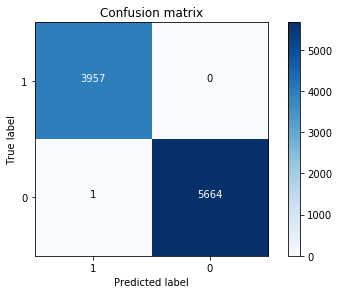

In [16]:
cnf_matrix = confusion_matrix(y_test, RF.predict(X_test))
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,0],title='Confusion matrix')
plt.show()
